<a href="https://colab.research.google.com/github/paolo0o0/Sber-Digital-Teams/blob/main/trees_competiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# День 2. Соревнование

[Kaggle соревнование](https://www.kaggle.com/t/fa841aa7c83e4419b13ac4ee7aca3800)

In [1]:
# Подгрузка датасетов
!gdown 1e05NSrbzI1V5k9OQ3kqaMdpIUErARQ2Q
!gdown 13UflXhQrAU9CNl4kmF9aQKp9Ggwz4VOB

Downloading...
From: https://drive.google.com/uc?id=1e05NSrbzI1V5k9OQ3kqaMdpIUErARQ2Q
To: /content/train.csv
100% 93.4k/93.4k [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=13UflXhQrAU9CNl4kmF9aQKp9Ggwz4VOB
To: /content/test.csv
100% 32.1k/32.1k [00:00<00:00, 60.1MB/s]


## Библиотеки

Импортируем необходимые библиотеки

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

## Загрузка данных

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv', index_col=[0])

In [4]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1012,0,0.5,1,4,0,39,0.1,161,4,...,882,1195,2802,8,0,10,1,1,0,2
1,878,1,1.3,0,13,1,31,0.5,153,4,...,575,618,3497,9,7,11,1,1,0,2
2,818,0,1.3,0,14,0,43,0.9,177,6,...,111,510,546,12,6,7,1,1,1,0
3,541,1,2.3,0,4,0,51,0.4,200,8,...,1012,1226,403,11,2,12,0,0,0,0
4,1195,1,2.8,0,1,1,20,0.8,110,2,...,1580,1652,504,9,3,12,1,1,0,0


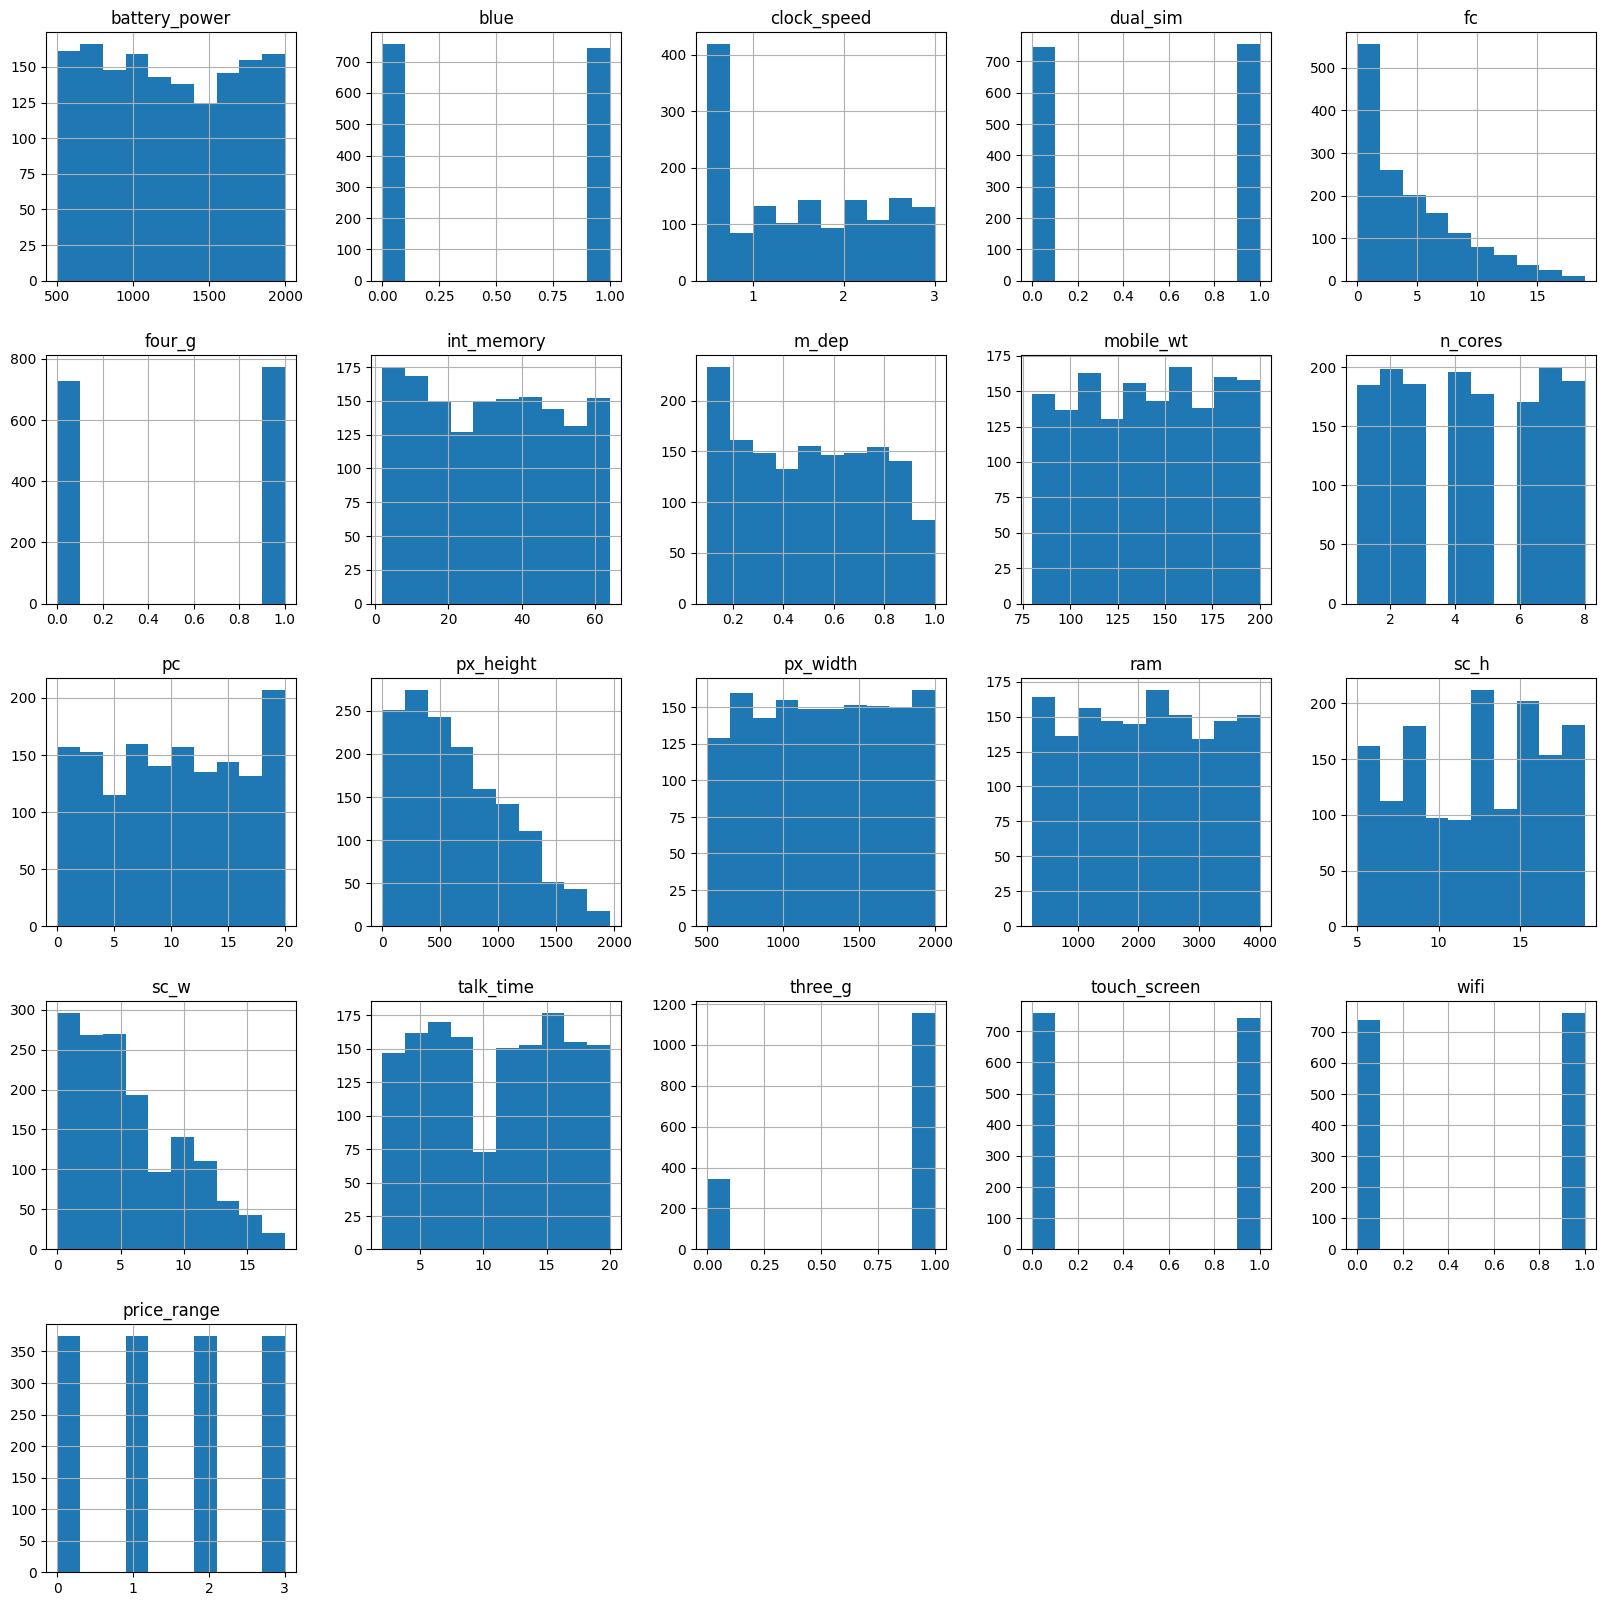

In [5]:
df_train.hist(figsize=(20, 20));

## Препроцессинг

Для корректной работы моделей, необходимо нормализовать данные

In [6]:
features_to_normalize = ['battery_power', 'fc', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'n_cores']

In [7]:
scaler = StandardScaler()
fitted_values = scaler.fit_transform(df_train[features_to_normalize])
df_train[features_to_normalize] = fitted_values

In [8]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.511181,0,0.5,1,-0.063158,0,0.378404,0.1,0.580372,-0.211963,...,0.519614,-0.153031,0.634710,-1.017215,-1.311797,-0.184088,1,1,0,2
1,-0.814068,1,1.3,0,1.986443,1,-0.060240,0.5,0.351466,-0.211963,...,-0.169365,-1.487574,1.277251,-0.780359,0.304096,-0.000733,1,1,0,2
2,-0.949688,0,1.3,0,2.214176,0,0.597726,0.9,1.038184,0.656738,...,-1.210687,-1.737367,-1.451006,-0.069793,0.073254,-0.734150,1,1,1,0
3,-1.575805,1,2.3,0,-0.063158,0,1.036370,0.4,1.696289,1.525440,...,0.811364,-0.081331,-1.583212,-0.306649,-0.850114,0.182621,0,0,0,0
4,-0.097537,1,2.8,0,-0.746358,1,-0.663377,0.8,-0.878904,-1.080665,...,2.086087,0.903965,-1.489835,-0.780359,-0.619272,0.182621,1,1,0,0


Делим данные на трейн и тест

In [9]:
features = df_train.drop(columns=['price_range'])
targets = df_train['price_range']
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=.33)

## Бейзлайн

In [10]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)
preds = tree.predict(X_test)

print(f'Точность на бейзлайн модели - {accuracy_score(y_test, preds)}')

Точность на бейзлайн модели - 0.804040404040404


In [11]:
best_model = tree

## Ваши эксперименты!

Попробуйте улучшить полученную точность. Вы можете попробовать другие модели (например, ансамбли, расмотренные на семинаре), попробовать подобрать гиперпараметры или улучшить препроцессинг данных (может быть, создать новые фичи).

In [22]:
# Здесь ваш код
from sklearn.model_selection import GridSearchCV
linear_model = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

lin_model = GridSearchCV(linear_model, parameters, cv=3, scoring='accuracy', verbose=5)

lin_model.fit(X_train, y_train)
print("Лучшие гиперпараметры:", lin_model.best_params_)
print("Лучшее значение метрики:", lin_model.best_score_)

best_model = lin_model

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ..................solver=newton-cg;, score=0.919 total time=   0.1s
[CV 2/3] END ..................solver=newton-cg;, score=0.946 total time=   0.1s
[CV 3/3] END ..................solver=newton-cg;, score=0.946 total time=   0.1s
[CV 1/3] END ......................solver=lbfgs;, score=0.919 total time=   0.1s
[CV 2/3] END ......................solver=lbfgs;, score=0.946 total time=   0.1s
[CV 3/3] END ......................solver=lbfgs;, score=0.946 total time=   0.1s
[CV 1/3] END ..................solver=liblinear;, score=0.755 total time=   0.0s
[CV 2/3] END ..................solver=liblinear;, score=0.812 total time=   0.0s
[CV 3/3] END ..................solver=liblinear;, score=0.788 total time=   0.0s
[CV 1/3] END ........................solver=sag;, score=0.919 total time=   0.1s
[CV 2/3] END ........................solver=sag;, score=0.946 total time=   0.1s
[CV 3/3] END ........................solver=sag;,

In [13]:
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

tree = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)
tree.fit(X_train, y_train)
print("Лучшие гиперпараметры:", tree.best_params_)
print("Лучшее значение метрики:", tree.best_score_)

Лучшие гиперпараметры: {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 25, 'min_samples_split': 6}
Лучшее значение метрики: 0.8328358208955224


In [21]:
from sklearn.model_selection import cross_val_score, KFold
xgbc = XGBClassifier()
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

xgbc.fit(X_train, y_train)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold)
print("Mean cross-validation score: %.2f" % kf_cv_scores.mean())

Mean cross-validation score: 0.91


## Получения результатов для загрузки на Kaggle

Не забудьте применить ваши методы обработки к тестовым данным!

In [23]:
# Обратите внимание, что scaler, который мы применяем, уже зафитен на данных выше
df_test[features_to_normalize] = scaler.transform(df_test[features_to_normalize])

# Здесь добавьте все методы, которые вы использовали

In [24]:
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
0,-1.347510,1,0.5,0,-0.974092,1,0.323573,0.8,-1.565622,0.222388,0.027826,0.530835,1.188451,-1.553627,-0.780359,-0.850114,-1.650921,1,1,0
1,0.881194,0,0.5,0,0.164575,1,0.049421,0.9,-1.136423,0.656738,-0.300827,-0.535174,-1.429752,1.151517,0.877628,0.996621,0.365975,1,0,0
2,1.254151,0,2.7,0,1.758709,1,0.652557,0.7,0.980958,0.222388,1.178111,0.010174,0.457575,0.635635,1.588194,0.765779,-0.917504,1,1,1
3,1.098187,1,1.8,0,-0.974092,1,-1.266513,0.8,-1.165036,-1.080665,-1.451112,0.010174,-1.001865,0.869538,1.351339,2.381672,-0.917504,1,0,0
4,0.474331,0,1.4,1,1.986443,0,-0.334393,1.0,0.437306,-0.646314,1.013785,2.561864,1.361919,-0.869483,-0.069793,0.765779,-0.917504,0,1,0


Переобучаем модель на всех тренировочных данных

In [25]:
best_model.fit(features.values, targets.values);

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ..................solver=newton-cg;, score=0.960 total time=   0.0s
[CV 2/3] END ..................solver=newton-cg;, score=0.940 total time=   0.0s
[CV 3/3] END ..................solver=newton-cg;, score=0.966 total time=   0.0s
[CV 1/3] END ......................solver=lbfgs;, score=0.960 total time=   0.0s
[CV 2/3] END ......................solver=lbfgs;, score=0.940 total time=   0.0s
[CV 3/3] END ......................solver=lbfgs;, score=0.966 total time=   0.0s
[CV 1/3] END ..................solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/3] END ..................solver=liblinear;, score=0.812 total time=   0.0s
[CV 3/3] END ..................solver=liblinear;, score=0.824 total time=   0.0s
[CV 1/3] END ........................solver=sag;, score=0.960 total time=   0.0s
[CV 2/3] END ........................solver=sag;, score=0.940 total time=   0.0s
[CV 3/3] END ........................solver=sag;,

In [26]:
test_preds = best_model.predict(df_test.values)

In [27]:
submission = pd.DataFrame(test_preds, columns=['price_range'])
submission.index.name = 'id'

In [30]:
submission.to_csv('my_submission.csv')

In [31]:
from google.colab import files
files.download('my_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>